<a href="https://colab.research.google.com/github/Lucas-O-S/Analise_Exploratoria_N2/blob/main/AnaliseExploratoria_N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Aluno(a): Adriana Kaori Kakazu - RA: 082220004 <br/>
Aluno(a): Lucas Oliveira Silva - RA: 082220019 <br/>
Aluno(a): Victor César Trindade Pereira - RA: 062220012 <br/>
Aluno(a): Vitoria Kaori Kuriyama - RA: 082220005 <br/>
Aluno(a): William Santim - RA: 082220033 <br/>
Data: 04/04/2025 <br/>

# 1. Preparando Dataset

## 1.1 importações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Links das tabelas
urlLinks = "https://raw.githubusercontent.com/Lucas-O-S/Analise_Exploratoria_N2/main/ml-latest-small/links.csv"
urlMovies = "https://raw.githubusercontent.com/Lucas-O-S/Analise_Exploratoria_N2/main/ml-latest-small/movies.csv"
urlRatings = "https://raw.githubusercontent.com/Lucas-O-S/Analise_Exploratoria_N2/main/ml-latest-small/ratings.csv"
urlTags = "https://raw.githubusercontent.com/Lucas-O-S/Analise_Exploratoria_N2/main/ml-latest-small/tags.csv"

#Criando datasets
links = pd.read_csv(urlLinks, encoding="unicode_escape")
movies = pd.read_csv(urlMovies, encoding="unicode_escape")
ratings = pd.read_csv(urlRatings, encoding="unicode_escape")
tags = pd.read_csv(urlTags, encoding="unicode_escape")

## 1.2 Corrigindo Datasets

### 1.2.1 Corrigindo tabela Links

- Verificando dados

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links.info()
print(links.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
movieId    0
imdbId     0
tmdbId     8
dtype: int64


- Correções

In [ ]:
links["tmdbId"] = links["tmdbId"].fillna(0).astype(int)

- Verificando Resultados

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [ ]:
links.info()
print(links.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  9742 non-null   int64
 1   imdbId   9742 non-null   int64
 2   tmdbId   9742 non-null   int64
dtypes: int64(3)
memory usage: 228.5 KB
movieId    0
imdbId     0
tmdbId     0
dtype: int64


### 1.2.2 Corrigindo tabela Movies

- Verificando Dados

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()
print(links.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
movieId    0
imdbId     0
tmdbId     0
dtype: int64


- Correções

In [ ]:
movies["title"] = movies["title"].astype(str)
movies["genres"] = movies["genres"].astype(str)

- Verificando Resultados

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()
print(links.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
movieId    0
imdbId     0
tmdbId     0
dtype: int64


### 1.2.3 Corrigindo Ratings

- Verificando Dados

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.info()
print(ratings.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


- Correções

In [ ]:
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit = "s")

- Verificando Resultados

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [ ]:
ratings.info()
print(ratings.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


### 1.2.4 Corrigindo Tags

- Verificando Dados

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
tags.info()
print(tags.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


- Correções

In [ ]:
tags["timestamp"] = pd.to_datetime(tags["timestamp"], unit = "s")
tags["tag"] = tags["tag"].astype(str)

- Verificando Resultados

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20


In [ ]:
tags.info()
print(tags.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     3683 non-null   int64         
 1   movieId    3683 non-null   int64         
 2   tag        3683 non-null   object        
 3   timestamp  3683 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 115.2+ KB
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


# 2. Existe alguma correlação entre o ano de lançamento do filme e sua avaliação média (média de ratings)?

## 2.1 Extraindo o ano do título do filme

In [ ]:
print("Extraindo o ano de lançamento dos filmes...")
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)
print("Ano de lançamento extraído com sucesso!")
print(movies[['title', 'year']].head(), "\n")

Extraindo o ano de lançamento dos filmes...
Ano de lançamento extraído com sucesso!
                                title    year
0                    Toy Story (1995)  1995.0
1                      Jumanji (1995)  1995.0
2             Grumpier Old Men (1995)  1995.0
3            Waiting to Exhale (1995)  1995.0
4  Father of the Bride Part II (1995)  1995.0 



##2.2 Calculando a média de avaliação por filme

In [ ]:
print("Calculando a média de avaliação por filme...")
ratings_avg = ratings.groupby('movieId')['rating'].mean().reset_index()
print("Média de avaliação calculada com sucesso!")
print(ratings_avg.head(), "\n")

Calculando a média de avaliação por filme...
Média de avaliação calculada com sucesso!
   movieId    rating
0        1  3.920930
1        2  3.431818
2        3  3.259615
3        4  2.357143
4        5  3.071429 



##2.3 Combinando as tabelas movies e ratings_avg

In [ ]:
print("Combinando os dados de filmes e avaliações...")
movies_ratings = pd.merge(movies, ratings_avg, on='movieId')
print("Dados combinados com sucesso!")
print(movies_ratings[['title', 'year', 'rating']].head(), "\n")

Combinando os dados de filmes e avaliações...
Dados combinados com sucesso!
                                title    year    rating
0                    Toy Story (1995)  1995.0  3.920930
1                      Jumanji (1995)  1995.0  3.431818
2             Grumpier Old Men (1995)  1995.0  3.259615
3            Waiting to Exhale (1995)  1995.0  2.357143
4  Father of the Bride Part II (1995)  1995.0  3.071429 



##2.4 Removendo valores nulos (caso algum filme não tenha ano)

In [ ]:
print("Removendo filmes sem ano de lançamento...")
movies_ratings = movies_ratings.dropna(subset=['year'])
print(f"Filmes restantes após remoção: {len(movies_ratings)}\n")

Removendo filmes sem ano de lançamento...
Filmes restantes após remoção: 9711



##2.5 Calculando a correlação entre o ano e a média de avaliação

In [ ]:
print("Calculando a correlação entre ano de lançamento e avaliação média...")
correlation = movies_ratings['year'].corr(movies_ratings['rating'])
print(f'Correlação entre ano de lançamento e avaliação média: {correlation}')

Calculando a correlação entre ano de lançamento e avaliação média...
Correlação entre ano de lançamento e avaliação média: -0.11090659724104945


#3. Qual o grupo mais disperso: usuários que avaliaram ou usuários que rotularam filmes?

In [ ]:
#função para facilitar o calculo da dispersão
def Dispersao(df):
  dados = {
      "Media" : df.mean(),
      "DP" : df.std(),
      "CV" : df.std() / df.mean()
  }
  return dados

## 3.1 Verificando a dispersão da tabela Tags

In [ ]:
#contagem de usuarios dentro de tags
countTags = tags["userId"].value_counts()

#dados de tags
dispersaoTags = Dispersao(countTags)

In [ ]:
countTags.head()

,count
userId,
474,1507
567,432
62,370
599,323
477,280


In [ ]:
dispersaoTags

{'Media': np.float64(63.5),
 'DP': 215.1181030169568,
 'CV': np.float64(3.3876866616843593)}

## 3.2 Verificando a dispersão da tabela Ratings

In [ ]:
#contagem de usuarios dentro de Ratings
countRatings = ratings["userId"].value_counts()

#dispersão de ratings
dispersaoRatings = Dispersao(countRatings)

In [ ]:
countRatings.head()

,count
userId,
414,2698
599,2478
474,2108
448,1864
274,1346


In [ ]:
dispersaoRatings

{'Media': np.float64(165.30491803278687),
 'DP': 269.4805843871718,
 'CV': np.float64(1.6302030671206198)}

## 3.3 Veficando Resultados

- Para verificar qual grupo está mais disperso sera comparado o coeficiente de variação de ambos

In [ ]:
if dispersaoRatings["CV"] > dispersaoTags["CV"]:
  print("O grupo de usuários que avaliaram é mais disperso")
else:
  print("O grupo de usuários que rotulam é mais disperso")

O grupo de usuários que rotulam é mais disperso


# 4. Qual a categoria rotulada mais frequente?

A categoria rotulada mais frequente está provavelmente relacionada aos gêneros dos filmes, que podem ser encontrados no arquivo movies.csv.  
Este arquivo contém informações sobre os filmes, incluindo seus títulos e gêneros.


In [ ]:
#verificando como é a tabela
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


Primeiro, vamos verificar quantas vezes o tal gênero aparece na tabela. O campo genres do arquivo movies.csv contém os gêneros dos filmes.

In [ ]:
# Contar a frequência dos gêneros
genre_counts = movies['genres'].str.split('|').explode().value_counts()

Em seguida, qual o gêneros mais frequente entre os filmes e o seu valor.

In [ ]:
# Exibir o gênero mais frequente
print("O gênero mais frequente é:", genre_counts.idxmax())
print("Com uma frequência de:", genre_counts.max())

O gênero mais frequente é: Drama
Com uma frequência de: 4361


# 5. Como estão distribuídas as avaliações ao longo do tempo?

In [ ]:
# Extrair o ano de cada avaliação
ratings['year'] = ratings['timestamp'].dt.year

In [ ]:
# Contagem de avaliações por ano
rating_counts = ratings.groupby('year')['rating'].count()

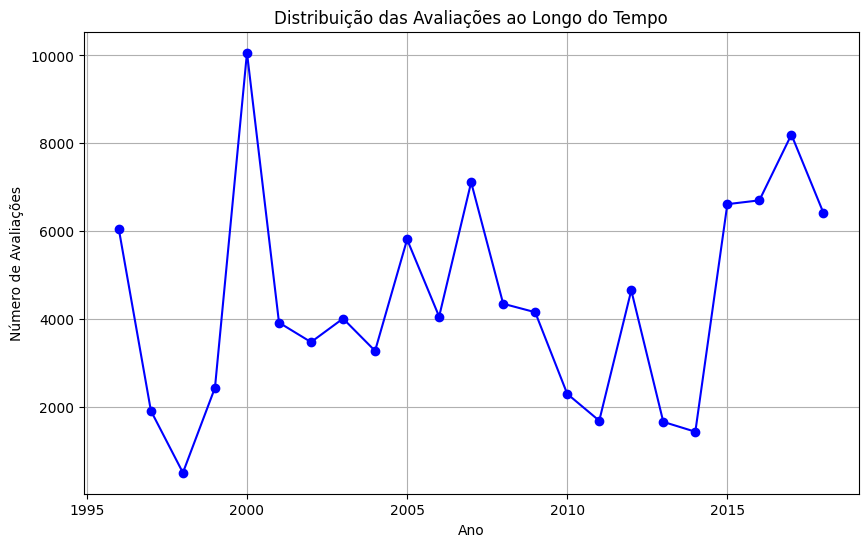

In [ ]:
# Plotar a distribuição das avaliações ao longo do tempo
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='line', marker='o', color='b')
plt.title('Distribuição das Avaliações ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Avaliações')
plt.grid(True)
plt.show()

#6. Perguntas Tabela Links

## 6.1 Há valores ausentes na coluna 'movieId'?

In [ ]:
# Obter o valor máximo de movieId
max_movieId = links['movieId'].max()

In [ ]:
# Obter o número total de linhas na base de dados
num_linhas = len(links)

In [ ]:
# Verificar se o valor máximo de movieId é igual ao número de linhas
if max_movieId == num_linhas:
    print(f"O valor máximo de 'movieId' ({max_movieId}) é igual ao número de linhas ({num_linhas}). Não parece haver valores ausentes.")
else:
    print(f"O valor máximo de 'movieId' é {max_movieId}, mas há {num_linhas} linhas na base de dados. Há valores ausentes.")

O valor máximo de 'movieId' é 193609, mas há 9742 linhas na base de dados. Há valores ausentes.


## 6.2 Existe alguma correlação entre o número de links registrados para um filme e o seu ID?

In [ ]:
# Calcular a quantidade de links por filme (movieId)
movie_link_count = links.groupby('movieId').size()

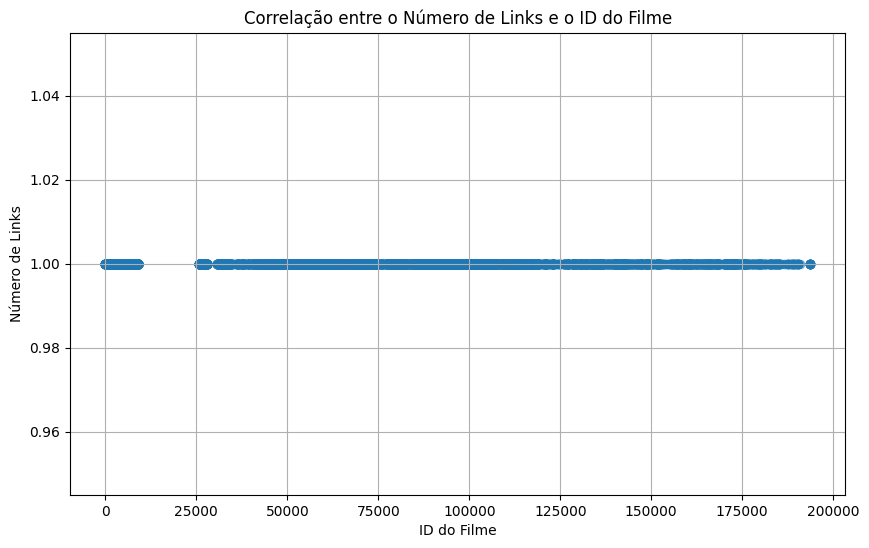

In [ ]:
# Plotar a correlação entre o número de links e o ID do filme
plt.figure(figsize=(10, 6))
plt.scatter(movie_link_count.index, movie_link_count.values, alpha=0.5)
plt.title('Correlação entre o Número de Links e o ID do Filme')
plt.xlabel('ID do Filme')
plt.ylabel('Número de Links')
plt.grid(True)
plt.show()

Logo, é possível confirmar que não existe uma correlação entre o número de links registrados para um filme e o seu ID.

#7 Perguntas Tabela Movies

##7.1 Qual é o gênero mais frequente entre os cinco primeiros filmes?


In [ ]:
genres_series = pd.Series('|'.join(movies['genres']).split('|'))
genero_mais_frequente = genres_series.value_counts().idxmax()
quantidade = genres_series.value_counts().max()
print(f'O gênero mais frequente entre os cinco primeiros filmes é {genero_mais_frequente} com {quantidade} ocorrências.')

O gênero mais frequente entre os cinco primeiros filmes é Drama com 4361 ocorrências.


##7.2 Qual a quantidade de filmes de 1995 que pertencem ao gênero Fantasy?

In [ ]:
fantasy_filmes = movies[movies['genres'].str.contains('Fantasy') & movies['title'].str.contains('\(1995\)')]
quantidade_fantasy = fantasy_filmes.shape[0]
print(f'Existem {quantidade_fantasy} filmes de 1995 que pertencem ao gênero Fantasy.')

Existem 16 filmes de 1995 que pertencem ao gênero Fantasy.


#8 Perguntas Tabela Ratings

##8.1 Qual ano possui a maior media de notas?


In [ ]:
ratings_estudo = ratings
ratings_estudo["ano"] = ratings["timestamp"].dt.year
rating_por_ano = ratings_estudo.groupby("ano")["rating"].mean()
maior = rating_por_ano.sort_values(ascending=False).head(1)
print(f"O ano que possui a maior média de notas é {maior.index[0]} com uma média de {maior.values[0]:.2f}")

O ano que possui a maior média de notas é 2013 com uma média de 3.88


##8.2 Qual usuario deu mais notas

In [ ]:
ratings_estudo = ratings
rating_por_usuario = ratings_estudo.groupby("userId")["rating"].count()
usuario = rating_por_usuario.sort_values(ascending=False)
print(f"O usuario {usuario.index[0]} foi aquele que deu nota ao maior numero de filmes, sendo o total de {usuario.values[0]}")

O usuario 414 foi aquele que deu nota ao maior numero de filmes, sendo o total de 2698


#9 Perguntas Tabela Tags

## 9.1 Quantas tags diferentes foram rotuladas?

In [ ]:
quantidade_textos_unicos = tags['tag'].nunique()

print("Quantidade de tag diferentes:", quantidade_textos_unicos)

Quantidade de tag diferentes: 1589


## 9.2 Quais foram as 10 tags mais escolhidas, mencionando a quantidade de vezes que apareceu?

In [ ]:
top_10_df = tags['tag'].value_counts().head(10).reset_index()
top_10_df.columns = ['Tag', 'Quantidade']

print(top_10_df)

                 Tag  Quantidade
0   In Netflix queue         131
1        atmospheric          36
2  thought-provoking          24
3          superhero          24
4            surreal          23
5              funny          23
6             Disney          23
7           religion          22
8             quirky          21
9             sci-fi          21
